# Micrograd #3

Let's build a binary classifier.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [2]:
np.random.seed(1337)
random.seed(1337)

Let's build a dataset. The make_moons function returns two arrays:

X: A 2D array of shape (100, 2) containing the feature values for each sample.

y: A 1D array of shape (100,) containing the labels for each sample. The labels are either 0 or 1.


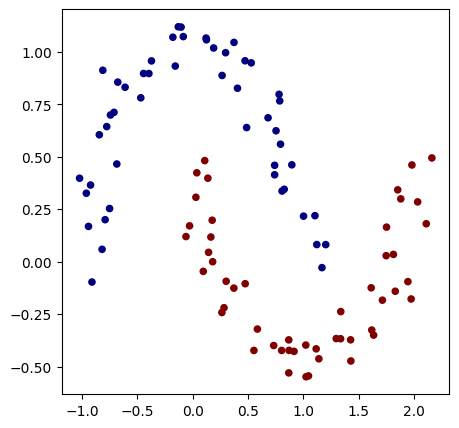

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)

y = y * 2 - 1 # make y be -1 or 1

# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

Let's initialize our MLP.

In [4]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("Number of parameters", len(model.parameters()))

MLP of [Layer of [Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu), Neuron(2, relu)], Layer of [Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu), Neuron(16, relu)], Layer of [Neuron(16, relu)]]
Number of parameters 337


Let's write a loss function.

In [5]:
def loss(batch_size=None):
    # Data loader
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    # Each xrow is a pair of x, y coords.
    # Wrap each of these values with a Value object.
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # Forward the model to get scores
    scores = list(map(model, inputs))
    
    # SVM "max-margin" loss
    losses = [(1 + -yi * scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p * p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # Also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.9093183735831943) 0.73


Let's write the training loop.

In [6]:
for k in range(100):
    # Forward
    total_loss, acc = loss()
    
    # Backward
    model.zero_grad()
    total_loss.backward()

    # Update (sgd)
    learning_rate = 1.0 - 0.9 * k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc * 100}%")

step 0 loss 0.9093183735831943, accuracy 73.0%
step 1 loss 5.01758810603327, accuracy 50.0%
step 2 loss 3.925334408704307, accuracy 78.0%
step 3 loss 31.063306842260992, accuracy 42.0%
step 4 loss 41.00108002027329, accuracy 53.0%
step 5 loss 11.451204570732505, accuracy 50.0%
step 6 loss 4332.119171016704, accuracy 50.0%
step 7 loss 279786.8709985529, accuracy 68.0%
step 8 loss 48476184172.13487, accuracy 50.0%
step 9 loss 4.4757556255586425e+20, accuracy 52.0%
step 10 loss 3.74551876280527e+40, accuracy 50.0%
step 11 loss 2.546775751044571e+80, accuracy 52.0%
step 12 loss 1.1428740199522806e+160, accuracy 50.0%


/home/thomas/Dev/Python/micrograd/micrograd/engine.py:44: RuntimeWarning: overflow encountered in scalar multiply
  out = Value(self.data * other.data, (self, other), "*")
/home/thomas/Dev/Python/micrograd/micrograd/engine.py:20: RuntimeWarning: invalid value encountered in scalar add
  out = Value(self.data + other.data, (self, other), "+")


step 13 loss 1.269705335164326e+211, accuracy 50.0%
step 14 loss 1.2692569148389577e+211, accuracy 50.0%
step 15 loss 1.2688132214037265e+211, accuracy 50.0%
step 16 loss 1.2683742500034315e+211, accuracy 50.0%
step 17 loss 1.2679399958355698e+211, accuracy 50.0%
step 18 loss 1.267510454150242e+211, accuracy 50.0%
step 19 loss 1.2670856202500763e+211, accuracy 50.0%
step 20 loss 1.2666654894901279e+211, accuracy 50.0%
step 21 loss 1.2662500572778104e+211, accuracy 50.0%
step 22 loss 1.2658393190727992e+211, accuracy 50.0%
step 23 loss 1.2654332703869576e+211, accuracy 50.0%
step 24 loss 1.265031906784248e+211, accuracy 50.0%
step 25 loss 1.26463522388066e+211, accuracy 50.0%
step 26 loss 1.2642432173441183e+211, accuracy 50.0%
step 27 loss 1.2638558828944158e+211, accuracy 50.0%
step 28 loss 1.2634732163031294e+211, accuracy 50.0%
step 29 loss 1.2630952133935433e+211, accuracy 50.0%
step 30 loss 1.2627218700405774e+211, accuracy 50.0%
step 31 loss 1.262353182170704e+211, accuracy 50.0%

Visualize decision boundary

(-1.548639298268643, 1.951360701731357)

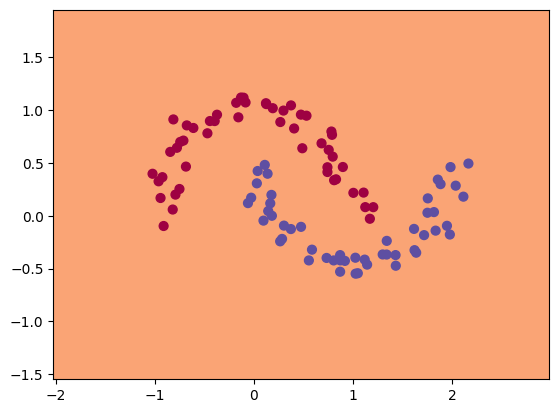

In [7]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())